### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ["EIN", "NAME"])
print(application_df.shape)
application_df.head(10)

(34299, 10)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

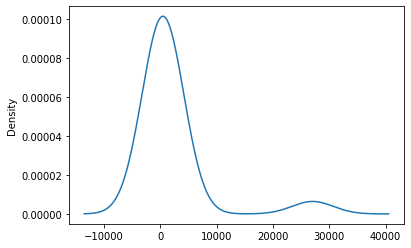

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
# use 500
replace_application = list(app_type_count[app_type_count <500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
unique_class = application_df.CLASSIFICATION.nunique()
class_count = application_df.CLASSIFICATION.value_counts()
print(unique_class)
print(class_count)

71
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C6100        1
C5200        1
C2561        1
C1900        1
C2500        1
Name: CLASSIFICATION, Length: 71, dtype: int64


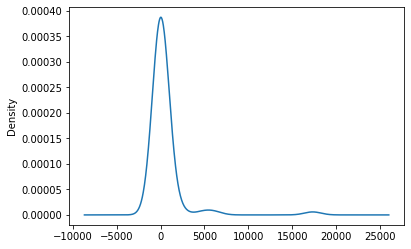

In [8]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
# use 1000 for fewer bins
replace_class = list(class_count[class_count < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
# name categorical_cat - used in the next cell
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns = "IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 857us/step - loss: 0.5725 - accuracy: 0.7174
Epoch 2/100
167/804 [=====>........................] - ETA: 0s - loss: 0.5478 - accuracy: 0.73 - ETA: 0s - loss: 0.5526 - accuracy: 0.7290
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 941us/step - loss: 0.5537 - accuracy: 0.7305
Epoch 3/100
337/804 [===========>..................] - ETA: 0s - loss: 0.5527 - accuracy: 0.7289
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 902us/step - loss: 0.5515 - accuracy: 0.7329
Epoch 4/100
537/804 [===================>..........] - ETA: 0s - loss: 0.5481 - accuracy: 0.7349
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 868us/step - loss: 0.5494 - accuracy: 0.7332
Epoch 5/100
754/804 [===========================>..] - ETA: 0s - loss: 0.5493 - accuracy: 0.7340
Epoch 00005: saving mod

804/804 [==============================] - 1s 874us/step - loss: 0.5389 - accuracy: 0.7396
Epoch 39/100
447/804 [===============>..............] - ETA: 0s - loss: 0.5401 - accuracy: 0.7411
Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 1s 913us/step - loss: 0.5389 - accuracy: 0.7399
Epoch 40/100
586/804 [====================>.........] - ETA: 0s - loss: 0.5401 - accuracy: 0.7381
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 1s 867us/step - loss: 0.5387 - accuracy: 0.7399
Epoch 41/100
804/804 [==============================] - 1s 851us/step - loss: 0.5384 - accuracy: 0.7398
Epoch 42/100
  1/804 [..............................] - ETA: 0s - loss: 0.6171 - accuracy: 0.6562
Epoch 00042: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 1s 808us/step - loss: 0.5384 - accuracy: 0.7404
Epoch 43/100
177/804 [=====>........................] - ETA: 0s - l

804/804 [==============================] - 1s 808us/step - loss: 0.5355 - accuracy: 0.7405
Epoch 76/100
663/804 [=======================>......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7427
Epoch 00076: saving model to checkpoints\weights.76.hdf5
804/804 [==============================] - 1s 857us/step - loss: 0.5351 - accuracy: 0.7421
Epoch 77/100
804/804 [==============================] - 1s 887us/step - loss: 0.5355 - accuracy: 0.7408
Epoch 78/100
 66/804 [=>............................] - ETA: 0s - loss: 0.5290 - accuracy: 0.7434
Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 1s 843us/step - loss: 0.5352 - accuracy: 0.7410
Epoch 79/100
273/804 [=========>....................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7463
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 1s 902us/step - loss: 0.5353 - accuracy: 0.7414
Epoch 80/100
437/804 [===============>..............] - ETA: 0s - l

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5657 - accuracy: 0.7255
Loss: 0.5656542778015137, Accuracy: 0.7254810333251953


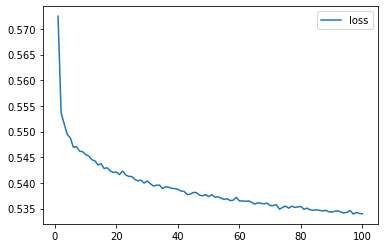

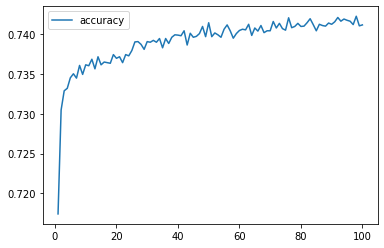

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
# score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input.
history_df.plot(y="loss")
# Plot the accuracy
# the higher the better
history_df.plot(y="accuracy")

In [21]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

### Deliverable 3: Optimize the Model

####  1. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=95, activation="relu", input_dim=43))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

 Logistic regression model accuracy: 0.468
Epoch 1/50
804/804 [==============================] - 1s 715us/step - loss: 0.5740 - accuracy: 0.7227
Epoch 2/50
804/804 [==============================] - 1s 746us/step - loss: 0.5574 - accuracy: 0.7304
Epoch 3/50
804/804 [==============================] - 1s 766us/step - loss: 0.5548 - accuracy: 0.7311
Epoch 4/50
804/804 [==============================] - 1s 769us/step - loss: 0.5522 - accuracy: 0.7331
Epoch 5/50
804/804 [==============================] - 1s 778us/step - loss: 0.5509 - accuracy: 0.7327
Epoch 6/50
804/804 [==============================] - 1s 786us/step - loss: 0.5503 - accuracy: 0.7318
Epoch 7/50
804/804 [==============================] - 1s 731us/step - loss: 0.5492 - accuracy: 0.7331
Epoch 8/50
804/804 [==============================] - 1s 779us/step - loss: 0.5494 - accuracy: 0.7331
Epoch 9/50
804/804 [==============================] - 1s 785us/step - loss: 0.5490 - accuracy: 0.7338
Epoch 10/50
804/804 [==================

#### 2. Random Forest Classifier

In [23]:
# Import our dependencies
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.708


In [25]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)
#Compared to the 200 training iterations for our logistic regression model, 
# we'll only train our neural network model through 50 epochs—this will limit the risk of overfitting our mode



Epoch 1/50
804/804 [==============================] - 1s 705us/step - loss: 0.5849 - accuracy: 0.7114
Epoch 2/50
804/804 [==============================] - 1s 731us/step - loss: 0.5558 - accuracy: 0.7290
Epoch 3/50
804/804 [==============================] - 1s 727us/step - loss: 0.5521 - accuracy: 0.7323
Epoch 4/50
804/804 [==============================] - 1s 696us/step - loss: 0.5509 - accuracy: 0.7319
Epoch 5/50
804/804 [==============================] - 1s 684us/step - loss: 0.5497 - accuracy: 0.7330
Epoch 6/50
804/804 [==============================] - 1s 770us/step - loss: 0.5487 - accuracy: 0.7346
Epoch 7/50
804/804 [==============================] - 1s 689us/step - loss: 0.5478 - accuracy: 0.7339
Epoch 8/50
804/804 [==============================] - 1s 822us/step - loss: 0.5473 - accuracy: 0.7339
Epoch 9/50
804/804 [==============================] - 1s 834us/step - loss: 0.5465 - accuracy: 0.7348
Epoch 10/50
804/804 [==============================] - 1s 690us/step - loss: 0.546

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5554 - accuracy: 0.7241
Loss: 0.5554445385932922, Accuracy: 0.7240816354751587


#### 3. Deep Learning (modified)

In [27]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 =  20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 

Epoch 1/50
804/804 [==============================] - 1s 859us/step - loss: 0.5937 - accuracy: 0.7068
Epoch 2/50
804/804 [==============================] - 1s 925us/step - loss: 0.5745 - accuracy: 0.7226
Epoch 3/50
804/804 [==============================] - 1s 869us/step - loss: 0.5698 - accuracy: 0.7250
Epoch 4/50
804/804 [==============================] - 1s 797us/step - loss: 0.5638 - accuracy: 0.7262
Epoch 5/50
804/804 [==============================] - 1s 839us/step - loss: 0.5594 - accuracy: 0.7290
Epoch 6/50
804/804 [==============================] - 1s 833us/step - loss: 0.5576 - accuracy: 0.7289
Epoch 7/50
804/804 [==============================] - 1s 846us/step - loss: 0.5551 - accuracy: 0.7309
Epoch 8/50
804/804 [==============================] - 1s 857us/step - loss: 0.5539 - accuracy: 0.7315
Epoch 9/50
804/804 [==============================] - 1s 895us/step - loss: 0.5528 - accuracy: 0.7309
Epoch 10/50
804/804 [==============================] - 1s 859us/step - loss: 0.552

In [29]:
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5541 - accuracy: 0.7262
Loss: 0.5541200637817383, Accuracy: 0.7261807322502136
